#### Question 1: -
#### Write a program that takes a string as input, and counts the frequency of each word in the string, there might be repeated characters in the string. Your task is to find the highest frequency and returns the length of the highest-frequency word.

In [2]:
def highest_frequency_len(sen):
    lst = sen.split()
    s = list(set(lst))
    c = []
    for i in s:      
        c.append(lst.count(i))
    g = c.index(max(c))
    d = len(s[g])
    return d
sen = input("enter the sentence : ")
print(highest_frequency_len(sen))

enter the sentence : Write a program that takes a string as input, and counts the frequency of each word in the string,
3


#### Question 2: -
#### Consider a string to be valid if all characters of the string appear the same number of times. It is also valid if he can remove just one character at the index in the string, and the remaining characters will occur the same number of times. Given a string, determine if it is valid. If so, return YES , otherwise return NO .

In [5]:
def is_valid_string(s):
    char_count = {}
    for char in s:
        char_count[char] = char_count.get(char, 0) + 1
    
    counts = list(char_count.values())
    max_count = max(counts)
    min_count = min(counts)
    
    if max_count == min_count:
        return "YES"
    else:
        return "NO"
    
string1 = "abc"
print(is_valid_string(string1)) 
string2 = "aabbc"
print(is_valid_string(string2)) 
string3 = "aabbcd"
print(is_valid_string(string3)) 

YES
NO
NO


#### Question 3: -
#### Write a program, which would download the data from the provided link, and then read the data and convert that into properly structured data and return it in Excel format. Note - Write comments wherever necessary explaining the code written.

In [89]:
import requests
import pandas as pd
import json
from openpyxl import Workbook
from pandas import ExcelWriter

#the function which will down load the data
def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.text
    else:
        raise Exception("Failed to download data from the provided link.")

def process_data(data):
    formatted_data = []
    for pokemon in data['pokemon']:
        formatted_pokemon ={
            'id':pokemon['id'],
            'weight':pokemon['weight'],
            'candy':len(list(pokemon['candy'])),
            'egg':pokemon['egg'],
            'spawn_chance':float(pokemon['spawn_chance']),
            'avg_spawns':float(pokemon['avg_spawns']),
            'spawn_time':pokemon['spawn_time'],
            'weakness' :len(pokemon["weaknesses"]),
            'multipliers' :len(pokemon["multipliers"]) if pokemon['multipliers'] else 0,
            'evolutions' :len(pokemon.get("next_evolution", []))
        
        }
        formatted_data.append(formatted_pokemon)
    
    return formatted_data

def convert_to_excel(data, output_file):
    df = pd.DataFrame(data)
    writer = ExcelWriter(output_file)
    df.to_excel(writer, encoding='utf8', index=False)
    writer.save()
# Example usage
url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"  # Replace with the actual URL of the data file
output_file = "outputnew.xlsx"  # Specify the desired output file name

# Download the data
data = download_data(url)

data = json.loads(data)

# Process the data
processed_data = process_data(data)

# Convert and save to Excel
convert_to_excel(processed_data, output_file)

In [21]:
!pip install openpyxl

#### Question 4 -
#### Write a program to download the data from the link given below and then read the data and convert the into the proper structure and return it as a CSV file.
#### Link - https://data.nasa.gov/resource/y77d-th95.json
#### Note - Write code comments wherever needed for code understanding.

In [60]:
import requests
import pandas as pd
import json
from openpyxl import Workbook
from pandas import ExcelWriter


#the function which will down load the data
def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.text
    else:
        raise Exception("Failed to download data from the provided link.")


def convert_to_csv(data, output_file):
    df = pd.DataFrame(data)
    df.to_csv(output_file,index=False)
    
# Example usage
url = "https://data.nasa.gov/resource/y77d-th95.json"  # Replace with the actual URL of the data file
output_file = "output3.csv"  # Specify the desired output file name

# Download the data
data = download_data(url)

data = json.loads(data)

# Process the data
# processed_data = process_data(data)

# Convert and save to Excel
convert_to_csv(data, output_file)

In [62]:
dt = pd.read_csv('output3.csv')

In [63]:
dt.head()

,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4,fall,geolocation,id,mass,name,nametype,recclass,reclat,reclong,year
0,NaN,NaN,Fell,"{'type': 'Point', 'coordinates': [6.08333, 50....",1,21.0,Aachen,Valid,L5,50.77500,6.08333,1880-01-01T00:00:00.000
1,NaN,NaN,Fell,"{'type': 'Point', 'coordinates': [10.23333, 56...",2,720.0,Aarhus,Valid,H6,56.18333,10.23333,1951-01-01T00:00:00.000
2,NaN,NaN,Fell,"{'type': 'Point', 'coordinates': [-113, 54.216...",6,107000.0,Abee,Valid,EH4,54.21667,-113.00000,1952-01-01T00:00:00.000
3,NaN,NaN,Fell,"{'type': 'Point', 'coordinates': [-99.9, 16.88...",10,1914.0,Acapulco,Valid,Acapulcoite,16.88333,-99.90000,1976-01-01T00:00:00.000
4,NaN,NaN,Fell,"{'type': 'Point', 'coordinates': [-64.95, -33....",370,780.0,Achiras,Valid,L6,-33.16667,-64.95000,1902-01-01T00:00:00.000


In [64]:
dt['geolocation'][0]

"{'type': 'Point', 'coordinates': [6.08333, 50.775]}"

#### Question 5 -
#### Write a program to download the data from the given API link and then extract the following data with proper formatting
#### Link - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes
#### Note - Write proper code comments wherever needed for the code understanding

In [79]:
import requests
import pandas as pd
import json
from openpyxl import Workbook
from pandas import ExcelWriter

all_data = []
#the function which will down load the data
def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception("Failed to download data from the provided link.")


def extract_data(response_data):
    print(response_data['id'])
    for item in range(len(response_data)):
        id = response_data['id']
        name = response_data['name']
    
        type = response_data['type']
        
        airtime = response_data['airtime']
        runtime = response_data['runtime']
        avg_rating = response_data['rating']['average']
        summary = response_data['summary']
        medium_img_link = response_data['image']['medium']
        original_image_link = response_data['image']['original']
        
        all_data.append([id, url, name])
        
                

def convert_to_csv():
    with open("data.csv", "w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(["ID","Name","Number","Type","AirDate","AirTime","RunTime","Average_Rating","Summary","Medium_link","Original_likn"])  # Header row
        writer.writerows(all_data) 
    
# Example usage
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"  # Replace with the actual URL of the data file
# output_file = "output3.csv"  # Specify the desired output file name

# Download the data
data = download_data(url)

# data = json.loads(data)
extract_data(data)
# Process the data
# processed_data = process_data(data)

# Convert and save to Excel
convert_to_csv()

1371


KeyError: 'airtime'

#### Question 6 -
#### Using the data from Question 3, write code to analyze the data and answer the following questions 
#### Note 1. Draw plots to demonstrate the analysis for the following questions for better visualizations.
#### 2. Write code comments wherever required for code understanding
#### Insights to be drawn -
##### Get all Pokemons whose spawn rate is less than 5%
##### Get all Pokemons that have less than 4 weaknesses
##### Get all Pokemons that have no multipliers at all
##### Get all Pokemons that do not have more than 2 evolutions
##### Get all Pokemons whose spawn time is less than 300 seconds.
#### Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.
##### Get all Pokemon who have more than two types of capabilities

In [98]:
data = pd.read_excel('outputnew.xlsx')

In [100]:
data.head()

,avg_spawns,candy,egg,evolutions,id,multipliers,spawn_chance,spawn_time,weakness,weight
0,69.0,15,2 km,2,1,1,0.690,20:00,4,6.9 kg
1,4.2,15,Not in Eggs,1,2,2,0.042,07:00,4,13.0 kg
2,1.7,15,Not in Eggs,0,3,0,0.017,11:30,4,100.0 kg
3,25.3,16,2 km,2,4,1,0.253,08:45,3,8.5 kg
4,1.2,16,Not in Eggs,1,5,1,0.012,19:00,3,19.0 kg


In [101]:
data.shape

(151, 10)

In [102]:
data.isnull().sum()

avg_spawns      0
candy           0
egg             0
evolutions      0
id              0
multipliers     0
spawn_chance    0
spawn_time      6
weakness        0
weight          0
dtype: int64

In [103]:
data.dropna(inplace=True)

In [104]:
data.isnull().sum()

avg_spawns      0
candy           0
egg             0
evolutions      0
id              0
multipliers     0
spawn_chance    0
spawn_time      0
weakness        0
weight          0
dtype: int64

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 148
Data columns (total 10 columns):
avg_spawns      145 non-null float64
candy           145 non-null int64
egg             145 non-null object
evolutions      145 non-null int64
id              145 non-null int64
multipliers     145 non-null int64
spawn_chance    145 non-null float64
spawn_time      145 non-null object
weakness        145 non-null int64
weight          145 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 12.5+ KB


In [110]:
data_weakness_4 = data[data['weakness']<4]

3    39
2    37
4    29
1    21
6     9
5     8
7     2
Name: weakness, dtype: int64

In [108]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

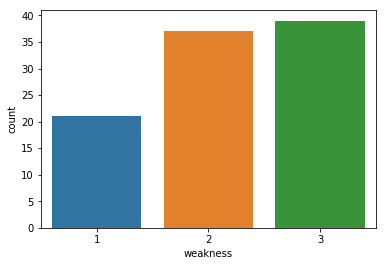

In [111]:
sns.countplot(data_weakness_4['weakness'])
plt.show()

In [114]:
d_multipliers_0 = data[data['multipliers']==0]

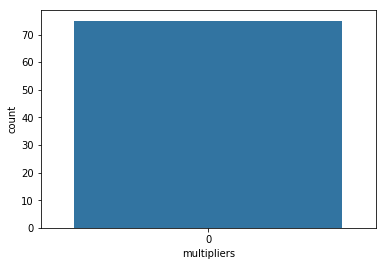

In [116]:
sns.countplot(d_multipliers_0['multipliers'])
plt.show()

In [117]:
d_evolutions = data[data['evolutions']<=2]

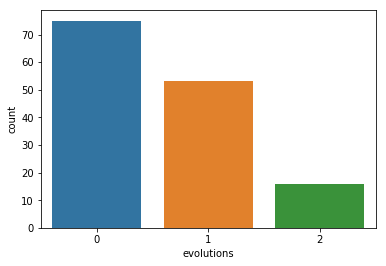

In [118]:
sns.countplot(d_evolutions['evolutions'])
plt.show()

In [123]:
data['spawn_time'] =  pd.to_timedelta(data['spawn_time'])

In [126]:
data['spawn_time'] = data['spawn_time'].dt.total_seconds().astype(int)

In [127]:
data.head()

,avg_spawns,candy,egg,evolutions,id,multipliers,spawn_chance,spawn_time,weakness,weight
0,69.0,15,2 km,2,1,1,0.690,1684526400,4,6.9 kg
1,4.2,15,Not in Eggs,1,2,2,0.042,1684479600,4,13.0 kg
2,1.7,15,Not in Eggs,0,3,0,0.017,1684495800,4,100.0 kg
3,25.3,16,2 km,2,4,1,0.253,1684485900,3,8.5 kg
4,1.2,16,Not in Eggs,1,5,1,0.012,1684522800,3,19.0 kg


In [128]:
data_s = data[data['spawn_time']>300]

C:\Users\k.vidya\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


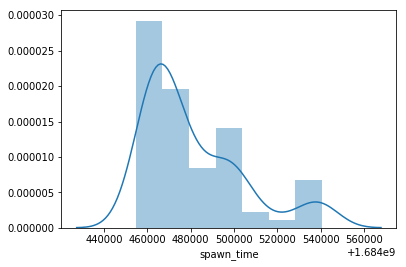

In [129]:
sns.distplot(data_s['spawn_time'])
plt.show()

#### Question 7 -
#### Using the data from Question 4, write code to analyze the data and answer the following questions Note -
##### 1. Draw plots to demonstrate the analysis for the following questions for better visualizations
##### 2. Write code comments wherever required for code understanding

#### Insights to be drawn -
##### Get all the Earth meteorites that fell before the year 2000
##### Get all the earth meteorites co-ordinates who fell before the year 1970
##### Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg

In [130]:
dataset = pd.read_csv('output3.csv')

In [131]:
dataset.head()

,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4,fall,geolocation,id,mass,name,nametype,recclass,reclat,reclong,year
0,NaN,NaN,Fell,"{'type': 'Point', 'coordinates': [6.08333, 50....",1,21.0,Aachen,Valid,L5,50.77500,6.08333,1880-01-01T00:00:00.000
1,NaN,NaN,Fell,"{'type': 'Point', 'coordinates': [10.23333, 56...",2,720.0,Aarhus,Valid,H6,56.18333,10.23333,1951-01-01T00:00:00.000
2,NaN,NaN,Fell,"{'type': 'Point', 'coordinates': [-113, 54.216...",6,107000.0,Abee,Valid,EH4,54.21667,-113.00000,1952-01-01T00:00:00.000
3,NaN,NaN,Fell,"{'type': 'Point', 'coordinates': [-99.9, 16.88...",10,1914.0,Acapulco,Valid,Acapulcoite,16.88333,-99.90000,1976-01-01T00:00:00.000
4,NaN,NaN,Fell,"{'type': 'Point', 'coordinates': [-64.95, -33....",370,780.0,Achiras,Valid,L6,-33.16667,-64.95000,1902-01-01T00:00:00.000


In [132]:
dataset.drop([':@computed_region_cbhk_fwbd',':@computed_region_nnqa_25f4'],axis=1,inplace=True)

In [133]:
dataset.head()

,fall,geolocation,id,mass,name,nametype,recclass,reclat,reclong,year
0,Fell,"{'type': 'Point', 'coordinates': [6.08333, 50....",1,21.0,Aachen,Valid,L5,50.77500,6.08333,1880-01-01T00:00:00.000
1,Fell,"{'type': 'Point', 'coordinates': [10.23333, 56...",2,720.0,Aarhus,Valid,H6,56.18333,10.23333,1951-01-01T00:00:00.000
2,Fell,"{'type': 'Point', 'coordinates': [-113, 54.216...",6,107000.0,Abee,Valid,EH4,54.21667,-113.00000,1952-01-01T00:00:00.000
3,Fell,"{'type': 'Point', 'coordinates': [-99.9, 16.88...",10,1914.0,Acapulco,Valid,Acapulcoite,16.88333,-99.90000,1976-01-01T00:00:00.000
4,Fell,"{'type': 'Point', 'coordinates': [-64.95, -33....",370,780.0,Achiras,Valid,L6,-33.16667,-64.95000,1902-01-01T00:00:00.000


In [134]:
dataset.shape

(1000, 10)

In [135]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
fall           1000 non-null object
geolocation    988 non-null object
id             1000 non-null int64
mass           972 non-null float64
name           1000 non-null object
nametype       1000 non-null object
recclass       1000 non-null object
reclat         988 non-null float64
reclong        988 non-null float64
year           999 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


In [154]:
def get_lattitude(data):
    if isinstance(data, str):
        s = data.split('coordinates')[1]
        k = s.split(',')[0]
        t = k[4:]
        return t
    else:
        return None
    

dataset['lattitude'] = dataset['geolocation'].apply(get_lattitude)

In [159]:
def get_longitude(data):
    if isinstance(data,str):
        s = data.split('coordinates')[1]
        k = s.split(',')[1]
        t = k[:-2]
        return t
    else:
        return None

    

dataset['longitude'] = dataset['geolocation'].apply(get_longitude)

In [160]:
dataset.head()

,fall,geolocation,id,mass,name,nametype,recclass,reclat,reclong,year,lattitude,longitude
0,Fell,"{'type': 'Point', 'coordinates': [6.08333, 50....",1,21.0,Aachen,Valid,L5,50.77500,6.08333,1880-01-01T00:00:00.000,6.08333,50.775
1,Fell,"{'type': 'Point', 'coordinates': [10.23333, 56...",2,720.0,Aarhus,Valid,H6,56.18333,10.23333,1951-01-01T00:00:00.000,10.23333,56.18333
2,Fell,"{'type': 'Point', 'coordinates': [-113, 54.216...",6,107000.0,Abee,Valid,EH4,54.21667,-113.00000,1952-01-01T00:00:00.000,-113,54.21667
3,Fell,"{'type': 'Point', 'coordinates': [-99.9, 16.88...",10,1914.0,Acapulco,Valid,Acapulcoite,16.88333,-99.90000,1976-01-01T00:00:00.000,-99.9,16.88333
4,Fell,"{'type': 'Point', 'coordinates': [-64.95, -33....",370,780.0,Achiras,Valid,L6,-33.16667,-64.95000,1902-01-01T00:00:00.000,-64.95,-33.16667


In [166]:
dataset['year'] = pd.to_datetime(dataset['year'], errors='coerce')



In [170]:
dataset['on_year'] = dataset['year'].dt.year

In [168]:
dataset.head()

,fall,geolocation,id,mass,name,nametype,recclass,reclat,reclong,year,lattitude,longitude,on_year
0,Fell,"{'type': 'Point', 'coordinates': [6.08333, 50....",1,21.0,Aachen,Valid,L5,50.77500,6.08333,1880-01-01,6.08333,50.775,1880.0
1,Fell,"{'type': 'Point', 'coordinates': [10.23333, 56...",2,720.0,Aarhus,Valid,H6,56.18333,10.23333,1951-01-01,10.23333,56.18333,1951.0
2,Fell,"{'type': 'Point', 'coordinates': [-113, 54.216...",6,107000.0,Abee,Valid,EH4,54.21667,-113.00000,1952-01-01,-113,54.21667,1952.0
3,Fell,"{'type': 'Point', 'coordinates': [-99.9, 16.88...",10,1914.0,Acapulco,Valid,Acapulcoite,16.88333,-99.90000,1976-01-01,-99.9,16.88333,1976.0
4,Fell,"{'type': 'Point', 'coordinates': [-64.95, -33....",370,780.0,Achiras,Valid,L6,-33.16667,-64.95000,1902-01-01,-64.95,-33.16667,1902.0


In [172]:
d_2000 = dataset[dataset['on_year']<2000.0]

In [173]:
d_2000.shape

(912, 13)

In [182]:
d_mass = dataset[dataset['mass']>10000]

In [179]:
!pip install plotly

  Using cached plotly-5.14.1-py2.py3-none-any.whl (15.3 MB)


In [183]:
d_mass.shape

(243, 13)

#### Question 9 -
#### Write a program to read the data from the following link, perform data analysis and answer the followingquestions
#### Note - 1. Write code comments wherever required for code understanding
#### Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD
#### Insights to be drawn -
##### Get all the cars and their types that do not qualify for clean alternative fuel vehicle
##### Get all TESLA cars with the model year, and model type made in Bothell City.
##### Get all the cars that have an electric range of more than 100, and were made after 2015
##### Draw plots to show the distribution between city and electric vehicle type

In [184]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [185]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [187]:
df.shape

(130443, 17)

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130443 entries, 0 to 130442
Data columns (total 17 columns):
VIN (1-10)                                           130443 non-null object
County                                               130440 non-null object
City                                                 130440 non-null object
State                                                130443 non-null object
Postal Code                                          130440 non-null float64
Model Year                                           130443 non-null int64
Make                                                 130443 non-null object
Model                                                130221 non-null object
Electric Vehicle Type                                130443 non-null object
Clean Alternative Fuel Vehicle (CAFV) Eligibility    130443 non-null object
Electric Range                                       130443 non-null int64
Base MSRP                                            1

In [190]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,130440.000000,130443.000000,130443.000000,130443.000000,130138.000000,1.304430e+05,1.304400e+05
mean,98167.633878,2019.554633,76.705718,1495.677346,29.577026,2.051796e+08,5.297177e+10
std,2492.197784,2.989137,99.421571,9844.748414,14.767508,8.710573e+07,1.640658e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.568004e+08,5.303301e+10
50%,98121.000000,2020.000000,23.000000,0.000000,34.000000,2.034934e+08,5.303303e+10
75%,98370.000000,2022.000000,151.000000,0.000000,43.000000,2.290791e+08,5.305307e+10
max,99701.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [193]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [192]:
df.dropna(inplace=True)

In [194]:
df[df.duplicated()]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract


In [195]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

Clean Alternative Fuel Vehicle Eligible                         60402
Eligibility unknown as battery range has not been researched    53108
Not eligible due to low battery range                           16379
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64

In [200]:
d_cars = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']=='Not eligible due to low battery range']

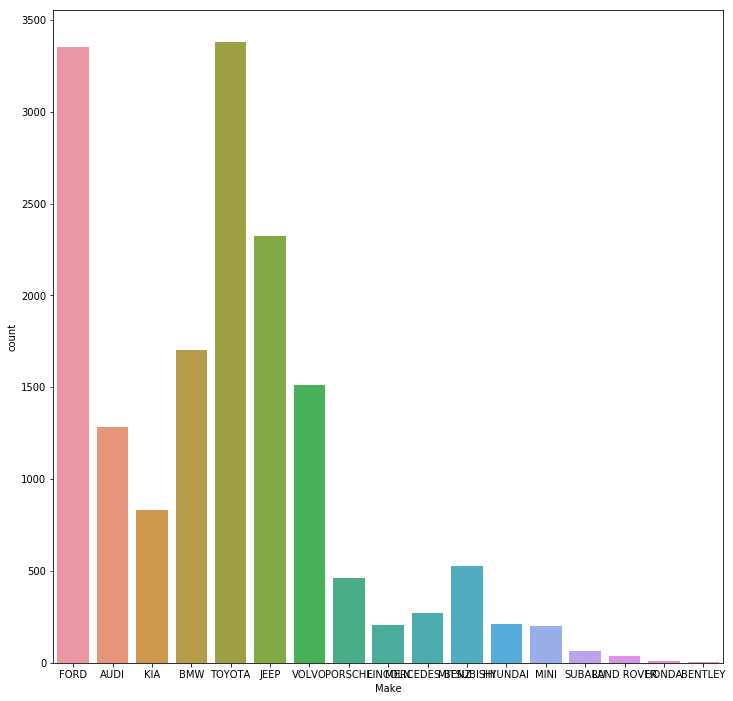

In [202]:
plt.figure(figsize=(12,12))
sns.countplot(d_cars['Make'])
plt.show()

In [210]:
d_models = df[(df['Make']=='TESLA') & (df['City']=='Bothell')]

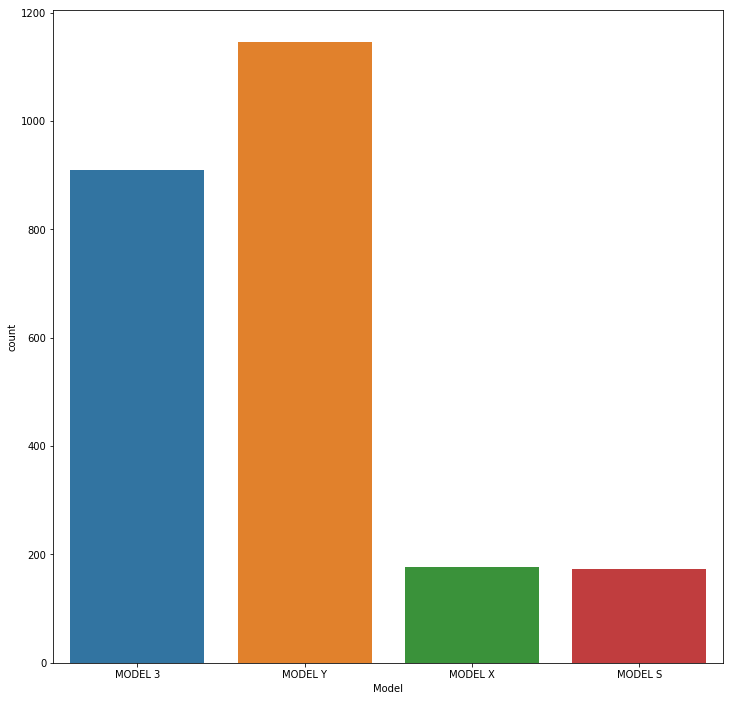

In [211]:
plt.figure(figsize=(12,12))
sns.countplot(d_models['Model'])
plt.show()

#### Question 10 -
#### Write a program to count the number of verbs, nouns, pronouns, and adjectives in a given particular phrase or paragraph, and return their respective count as a dictionary.
#### Note - 1. Write code comments wherever required for code
#### 2. You have to write at least 2 additional test cases in which your program will run successfully and provide an explanation for the same.

In [2]:
import nltk
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\k.vidya\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize

def count_pos_tags(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Perform Part-of-Speech tagging
    tagged_words = pos_tag(words)
    
    # Initialize counts for verbs, nouns, pronouns, and adjectives
    counts = {'Verbs': 0, 'Nouns': 0, 'Pronouns': 0, 'Adjectives': 0}
    
    # Count the occurrences of each POS tag
    for word, tag in tagged_words:
        if tag.startswith('V'):  # Verb
            counts['Verbs'] += 1
        elif tag.startswith('N'):  # Noun
            counts['Nouns'] += 1
        elif tag == 'PRP' or tag == 'PRP$':  # Pronoun
            counts['Pronouns'] += 1
        elif tag.startswith('J'):  # Adjective
            counts['Adjectives'] += 1
    
    return counts

# Example usage
text = "The quick brown fox jumps over the lazy dog. He enjoys running in the park."
counts = count_pos_tags(text)
print(counts)


{'Verbs': 3, 'Nouns': 4, 'Pronouns': 1, 'Adjectives': 2}
